In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [125, 125]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'

In [4]:
Infected_train_images = glob(train_path+"/Infected/*.png")
Uninfected_train_images = glob(train_path+"/Uninfected/*.png")

Infected_test_images = glob(valid_path+"/Infected/*.png")
Uninfected_test_images = glob(valid_path+"/Uninfected/*.png")

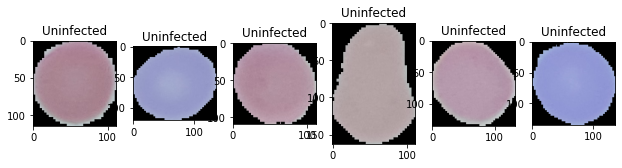

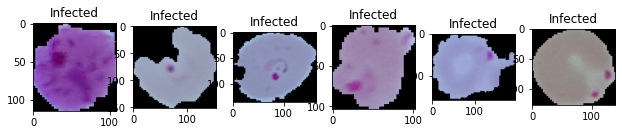

In [5]:
#Uninfected images
plt.figure(figsize=(14,14))
import random, cv2
for i in range(6):
    plt.subplot(2,8,i+1)
    type1="Uninfected"
    imgdir = train_path+"/"+type1
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type1)
plt.show()

#Infected images
plt.figure(figsize=(14,14))
for i in range(6):
    plt.subplot(2,8,i+1)
    type2="Infected"
    imgdir = valid_path+"/"+type2
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type2)
plt.show()

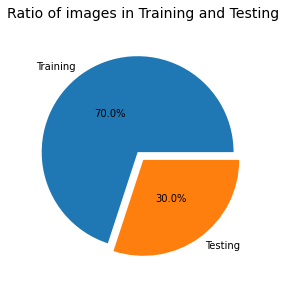

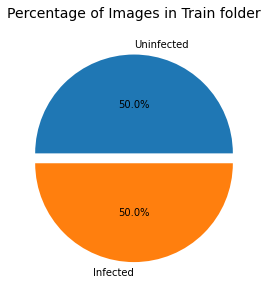

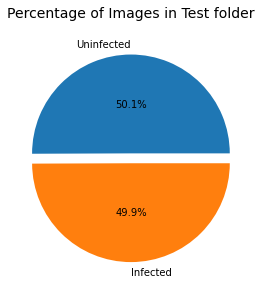

In [6]:
#Data visualization

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.pie(x=np.array([len(Infected_train_images+Uninfected_train_images), len(Infected_test_images+Uninfected_test_images)]), autopct="%.1f%%", explode=[0.1,0], labels=["Training", "Testing"], pctdistance=0.5)
plt.title("Ratio of images in Training and Testing\n", fontsize=14);

plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.pie(x=np.array([len(Infected_train_images), len(Uninfected_train_images)]), autopct="%.1f%%", explode=[0.1,0], labels=["Uninfected", "Infected"], pctdistance=0.5)
plt.title("Percentage of Images in Train folder\n", fontsize=14);

plt.figure(figsize=(15, 10))
plt.subplot(2,1,2)
plt.pie(x=np.array([len(Infected_test_images), len(Uninfected_test_images)]), autopct="%.1f%%", explode=[0.1,0], labels=["Uninfected", "Infected"], pctdistance=0.5)
plt.title("Percentage of Images in Test folder\n", fontsize=14);

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (125, 125),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19290 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (125, 125),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8278 images belonging to 2 classes.


In [10]:
INPUT_SHAPE = (125, 125, 3)

In [11]:
inp = tf.keras.layers.Input(shape=INPUT_SHAPE)

conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                               activation='relu', padding='same')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3),
                               activation='relu', padding='same')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

flat = tf.keras.layers.Flatten()(pool3)

hidden1 = tf.keras.layers.Dense(512, activation='relu')(flat)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(2, activation='softmax')(drop2)

model = tf.keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 125, 125, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0     

In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
603/603 [==============================] - 7350s 12s/step - loss: 0.4036 - accuracy: 0.8170 - val_loss: 0.2139 - val_accuracy: 0.9092
Epoch 2/20
603/603 [==============================] - 154s 255ms/step - loss: 0.1555 - accuracy: 0.9515 - val_loss: 0.1961 - val_accuracy: 0.9362
Epoch 3/20
603/603 [==============================] - 154s 255ms/step - loss: 0.1415 - accuracy: 0.9547 - val_loss: 0.1688 - val_accuracy: 0.9500
Epoch 4/20
603/603 [==============================] - 153s 254ms/step - loss: 0.1355 - accuracy: 0.9584 - val_loss: 0.1689 - val_accuracy: 0.9456
Epoch 5/20
603/603 [==============================] - 153s 254ms/step - loss: 0.1330 - accuracy: 0.9581 - val_loss: 0.1665 - val_accuracy: 0.9484
Epoch 6/20
603/603 [==============================] - 153s 254ms/step - loss: 0.1337 - accuracy: 0.9585 - val_loss: 0.1645 - val_accuracy: 0.9523
Epoch 7/20
603/603 [==============================] - 154s 255ms/step - loss: 0.1273 - accuracy: 0.9590 - val_loss: 0.1539 - 

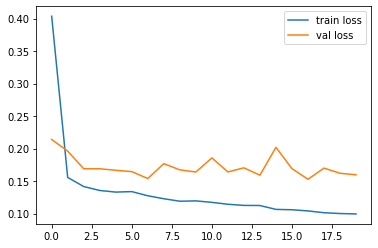

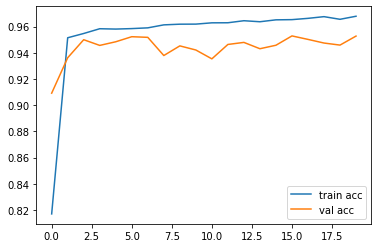

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')